In [194]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import ttest_ind, f_oneway
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [2]:
file_path = r"C:\Users\leube\Ironhack\Bootcamp\Final_project\archive (33)\StudentPerformanceFactors.csv"

df = pd.read_csv(file_path)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


C:\Users\leube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

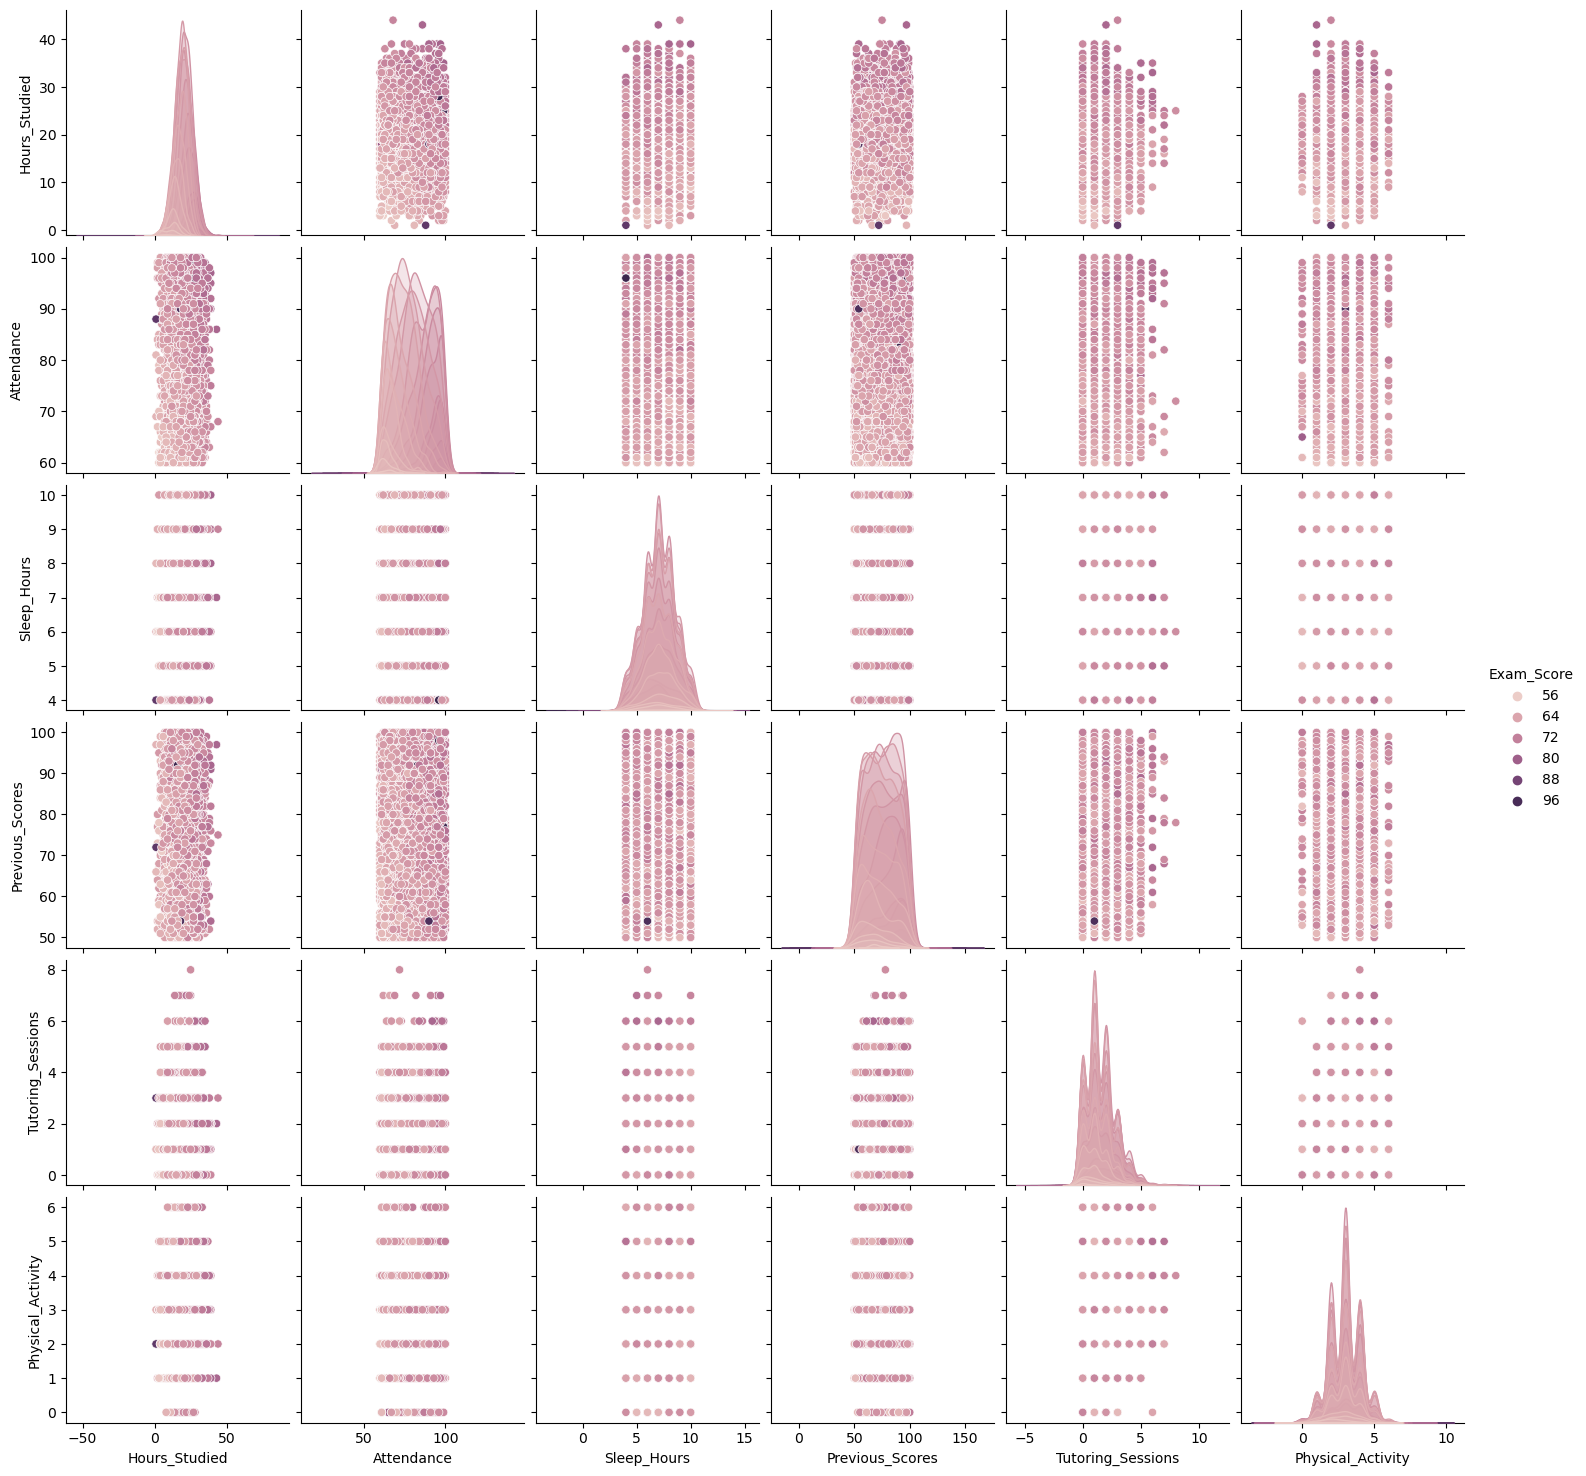

In [206]:
sns.pairplot(df, hue="Exam_Score")
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
df_cleaned = df.dropna()

In [6]:
df_cleaned

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [8]:
df_cleaned['Parental_Involvement'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [9]:
df_cleaned['Parental_Involvement'] = df_cleaned['Parental_Involvement'].replace('Low', 1).replace('Medium', 2).replace('High', 3)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\3106882308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Parental_Involvement'] = df_cleaned['Parental_Involvement'].replace('Low', 1).replace('Medium', 2).replace('High', 3)


In [10]:
df_cleaned['Parental_Involvement']

0       1
1       1
2       2
3       1
4       2
       ..
6602    3
6603    3
6604    2
6605    3
6606    2
Name: Parental_Involvement, Length: 6378, dtype: int64

In [11]:
df_cleaned['Access_to_Resources'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [12]:
df_cleaned['Access_to_Resources'] = df_cleaned['Access_to_Resources'].replace('Low', 1).replace('Medium', 2).replace('High', 3)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\965109487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Access_to_Resources'] = df_cleaned['Access_to_Resources'].replace('Low', 1).replace('Medium', 2).replace('High', 3)


In [13]:
df_cleaned['Access_to_Resources']

0       3
1       2
2       2
3       2
4       2
       ..
6602    2
6603    2
6604    1
6605    3
6606    1
Name: Access_to_Resources, Length: 6378, dtype: int64

In [14]:
df_cleaned['Extracurricular_Activities'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df_cleaned['Extracurricular_Activities'] = df_cleaned['Extracurricular_Activities'].replace('No', 0).replace('Yes', 1)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\2374457325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Extracurricular_Activities'] = df_cleaned['Extracurricular_Activities'].replace('No', 0).replace('Yes', 1)


In [16]:
df_cleaned['Extracurricular_Activities']

0       0
1       0
2       1
3       1
4       1
       ..
6602    0
6603    0
6604    1
6605    1
6606    1
Name: Extracurricular_Activities, Length: 6378, dtype: int64

In [17]:
df_cleaned['Motivation_Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [18]:
df_cleaned['Motivation_Level'] = df_cleaned['Motivation_Level'].replace('Low', 1).replace('Medium', 2).replace('High', 3)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\2127333163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Motivation_Level'] = df_cleaned['Motivation_Level'].replace('Low', 1).replace('Medium', 2).replace('High', 3)


In [19]:
df_cleaned['Motivation_Level']

0       1
1       1
2       2
3       2
4       2
       ..
6602    2
6603    2
6604    1
6605    3
6606    2
Name: Motivation_Level, Length: 6378, dtype: int64

In [20]:
df_cleaned['Internet_Access'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df_cleaned['Internet_Access'] = df_cleaned['Internet_Access'].replace('No', 0).replace('Yes', 1)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\743129517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Internet_Access'] = df_cleaned['Internet_Access'].replace('No', 0).replace('Yes', 1)


In [22]:
df_cleaned['Internet_Access']

0       1
1       1
2       1
3       1
4       1
       ..
6602    1
6603    1
6604    1
6605    1
6606    1
Name: Internet_Access, Length: 6378, dtype: int64

In [23]:
df['Family_Income'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [24]:
df_cleaned['Family_Income'] = df_cleaned['Family_Income'].replace('Low', 1).replace('Medium', 2).replace('High', 3)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\311212474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Family_Income'] = df_cleaned['Family_Income'].replace('Low', 1).replace('Medium', 2).replace('High', 3)


In [25]:
df_cleaned['Family_Income']

0       1
1       2
2       2
3       2
4       2
       ..
6602    3
6603    1
6604    1
6605    1
6606    2
Name: Family_Income, Length: 6378, dtype: int64

In [26]:
df_cleaned['Teacher_Quality'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [27]:
df_cleaned['Teacher_Quality'] = df_cleaned['Teacher_Quality'].replace('Low', 1).replace('Medium', 2).replace('High', 3)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\1705296519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Teacher_Quality'] = df_cleaned['Teacher_Quality'].replace('Low', 1).replace('Medium', 2).replace('High', 3)


In [28]:
df_cleaned['Teacher_Quality']

0       2
1       2
2       2
3       2
4       3
       ..
6602    2
6603    3
6604    2
6605    2
6606    2
Name: Teacher_Quality, Length: 6378, dtype: int64

In [29]:
df_cleaned['School_Type'].unique()

array(['Public', 'Private'], dtype=object)

In [30]:
df_cleaned['School_Type'] = df_cleaned['School_Type'].replace('Public', 0).replace('Private', 1)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\1502706732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['School_Type'] = df_cleaned['School_Type'].replace('Public', 0).replace('Private', 1)


In [31]:
df_cleaned['School_Type']

0       0
1       0
2       0
3       0
4       0
       ..
6602    0
6603    0
6604    0
6605    1
6606    0
Name: School_Type, Length: 6378, dtype: int64

In [32]:
df_cleaned['Peer_Influence'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [33]:
df_cleaned['Peer_Influence'] = df_cleaned['Peer_Influence'].replace('Positive', 1).replace('Negative', 2).replace('Neutral', 3)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\2156363108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Peer_Influence'] = df_cleaned['Peer_Influence'].replace('Positive', 1).replace('Negative', 2).replace('Neutral', 3)


In [34]:
df_cleaned['Peer_Influence']

0       1
1       2
2       3
3       2
4       3
       ..
6602    1
6603    1
6604    2
6605    1
6606    1
Name: Peer_Influence, Length: 6378, dtype: int64

In [35]:
df_cleaned['Learning_Disabilities'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
df_cleaned['Learning_Disabilities'] = df_cleaned['Learning_Disabilities'].replace('No', 0).replace('Yes', 1)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\652964834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Learning_Disabilities'] = df_cleaned['Learning_Disabilities'].replace('No', 0).replace('Yes', 1)


In [37]:
df_cleaned['Learning_Disabilities']

0       0
1       0
2       0
3       0
4       0
       ..
6602    0
6603    0
6604    0
6605    0
6606    0
Name: Learning_Disabilities, Length: 6378, dtype: int64

In [38]:
df_cleaned['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate'], dtype=object)

In [39]:
df_cleaned['Parental_Education_Level'] = df_cleaned['Parental_Education_Level'].replace('College', 1).replace('High School', 2).replace('Postgraduate', 3)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\1554310522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Parental_Education_Level'] = df_cleaned['Parental_Education_Level'].replace('College', 1).replace('High School', 2).replace('Postgraduate', 3)


In [40]:
df_cleaned['Parental_Education_Level']

0       2
1       1
2       3
3       2
4       1
       ..
6602    2
6603    2
6604    3
6605    2
6606    3
Name: Parental_Education_Level, Length: 6378, dtype: int64

In [41]:
df_cleaned['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far'], dtype=object)

In [42]:
df_cleaned['Distance_from_Home'] = df_cleaned['Distance_from_Home'].replace('Near', 1).replace('Moderate', 2).replace('Far', 3)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\400226966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Distance_from_Home'] = df_cleaned['Distance_from_Home'].replace('Near', 1).replace('Moderate', 2).replace('Far', 3)


In [43]:
df_cleaned['Distance_from_Home']

0       1
1       2
2       1
3       2
4       1
       ..
6602    1
6603    1
6604    1
6605    3
6606    1
Name: Distance_from_Home, Length: 6378, dtype: int64

In [44]:
df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [45]:
df_cleaned['Gender'] = df_cleaned['Gender'].replace('Female', 0).replace('Male', 1)

C:\Users\leube\AppData\Local\Temp\ipykernel_14648\3094695113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df_cleaned['Gender'].replace('Female', 0).replace('Male', 1)


In [46]:
binary_columns = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']
multi_class_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']

In [47]:
for column in binary_columns:
    group1 = df_cleaned[df_cleaned[column] == 0]['Exam_Score']
    group2 = df_cleaned[df_cleaned[column] == 1]['Exam_Score']
    t_stat, p_val = ttest_ind(group1, group2)
    print(f'{column}: t-stat = {t_stat}, p-value = {p_val}')
    significance = "less than 0.05" if p_val < 0.05 else "greater than 0.05"
    print(f"{column}: p-values = {p_val} (p-value is {significance})")

Extracurricular_Activities: t-stat = -5.0455837895021345, p-value = 4.6465544032214617e-07
Extracurricular_Activities: p-values = 4.6465544032214617e-07 (p-value is less than 0.05)
Internet_Access: t-stat = -4.08756319841647, p-value = 4.4128283860873265e-05
Internet_Access: p-values = 4.4128283860873265e-05 (p-value is less than 0.05)
School_Type: t-stat = -0.8678688768139758, p-value = 0.3854987810270891
School_Type: p-values = 0.3854987810270891 (p-value is greater than 0.05)
Learning_Disabilities: t-stat = 6.724032864609853, p-value = 1.9211255816166116e-11
Learning_Disabilities: p-values = 1.9211255816166116e-11 (p-value is less than 0.05)
Gender: t-stat = 0.39386280795717277, p-value = 0.6936955012015205
Gender: p-values = 0.6936955012015205 (p-value is greater than 0.05)


In [48]:
#Statistically significant: 
#   Extracurricular activities
#   Internet acess
#   learning disabilities
#   Parental involvement
#   Access to recources
#   Motivation level
#   Family income
#   Teacher Quality
#   Peer influence
#   Parental education level
#   Distance from home
#Not significant:
#   School type
#   gender

In [49]:
for column in multi_class_columns:
    groups = [df_cleaned[df_cleaned[column] == values]['Exam_Score'] for values in df_cleaned[column].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f'{column}: F-stat = {f_stat}, p-value = {p_val}')
    significance = "less than 0.05" if p_val < 0.05 else "greater than 0.05"
    print(f"{column}: p-value = {p_val} (p-value is {significance})")

Parental_Involvement: F-stat = 80.46222821867522, p-value = 3.086484723306131e-35
Parental_Involvement: p-value = 3.086484723306131e-35 (p-value is less than 0.05)
Access_to_Resources: F-stat = 92.41635984339177, p-value = 2.7221702287329308e-40
Access_to_Resources: p-value = 2.7221702287329308e-40 (p-value is less than 0.05)
Motivation_Level: F-stat = 25.535515172788962, p-value = 9.000204034394693e-12
Motivation_Level: p-value = 9.000204034394693e-12 (p-value is less than 0.05)
Family_Income: F-stat = 28.782492235095216, p-value = 3.59767227814745e-13
Family_Income: p-value = 3.59767227814745e-13 (p-value is less than 0.05)
Teacher_Quality: F-stat = 18.597490428613316, p-value = 8.844704258489237e-09
Teacher_Quality: p-value = 8.844704258489237e-09 (p-value is less than 0.05)
Peer_Influence: F-stat = 32.18033265754196, p-value = 1.2426130744876118e-14
Peer_Influence: p-value = 1.2426130744876118e-14 (p-value is less than 0.05)
Parental_Education_Level: F-stat = 35.94710753828243, p-v

In [50]:
df_clean_and_feature_engineered = df_cleaned.drop(columns = ['School_Type', 'Gender'])

In [51]:
df_cleaned.to_csv('cleaned_fp_df', index=False)

In [52]:
df_clean_and_feature_engineered.to_csv('clean_and_fe_fp:df', index=False)

In [53]:
features = df_cleaned.drop(columns = ['Exam_Score'])
target = df_cleaned['Exam_Score']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [55]:
lin_reg = LinearRegression()

In [56]:
lin_reg.fit(X_train, y_train) # Determines the b0 and b1's values

LinearRegression()

In [210]:
y_pred_test = lin_reg.predict(X_test)

#lin_reg.score(X_test, y_test)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"RMSE, {mean_squared_error(y_pred_test, y_test, squared=False): .2f}") # sqrt( mean( (y_test - y_pred_test)^2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test, y_test): .2f}")

MAE  0.70
RMSE,  2.21
R2 score,  0.68


In [152]:
forest = RandomForestRegressor(n_estimators=400,
                             max_depth=15)

In [153]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=400)

In [155]:
y_pred_test_rf = forest.predict(X_test)

print(f"MAE, {mean_absolute_error(y_pred_test_rf, y_test): .2f}")
print(f"RMSE, {mean_squared_error(y_pred_test_rf, y_test, squared=False): .2f}")
print(f"R2 score, {forest.score(X_test, y_test): .2f}")

MAE,  1.21
RMSE,  2.49
R2 score,  0.60


In [214]:
gb_reg = GradientBoostingRegressor(max_depth=15,
                                   n_estimators=400)

In [216]:
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=15, n_estimators=400)

In [217]:
y_pred_test_gb = gb_reg.predict(X_test)

print(f"MAE, {mean_absolute_error(y_pred_test_gb, y_test): .2f}")
print(f"RMSE, {mean_squared_error(y_pred_test_gb, y_test, squared=False): .2f}")
print(f"R2 score, {gb_reg.score(X_test, y_test): .2f}")

MAE,  1.60
RMSE,  3.13
R2 score,  0.36


In [64]:
features2 = df_clean_and_feature_engineered.drop(columns = ['Exam_Score'])
target2 = df_clean_and_feature_engineered['Exam_Score']

In [65]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size = 0.20, random_state=0)

In [66]:
X_train2

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
2675,8,64,3,2,0,7,82,3,1,0,3,2,3,1,1,3,1
548,22,76,2,1,0,9,76,2,1,2,1,3,3,5,0,2,3
5887,15,80,3,2,0,8,80,2,1,1,1,2,3,4,0,2,2
3379,16,61,3,2,0,4,54,1,1,1,1,2,3,2,0,2,1
154,22,76,2,2,1,8,92,2,1,1,1,3,3,4,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,21,71,2,2,0,8,54,3,1,1,2,2,3,3,0,2,1
3382,21,70,3,3,1,8,72,1,1,3,2,1,3,1,0,3,2
1714,17,88,1,1,0,5,67,2,0,0,2,3,3,3,0,3,1
2698,24,78,3,1,1,9,94,1,1,0,1,3,3,4,0,2,2


C:\Users\leube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Exam_Score', ylabel='Count'>

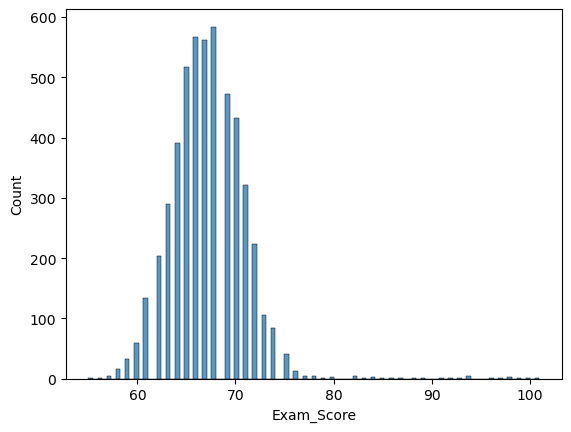

In [164]:
sns.histplot(y_train2)

In [168]:
pt_y = PowerTransformer(standardize=True)
pt_y.fit(y_train2)

pt_x = PowerTransformer(standardize=True)
pt_x.fit(X_train2)

y_train2_trans_np = pt_y.transform(y_train2)
y_train2_trans = pd.Series(y_train2_trans, index=y_train2.index)

# fit all the models with
# model.fit(X_train2, y_train2_trans) -> y_pred_trans = model.predict(...) -> the predictions will be transfomed!
# To undo the transformations in the predicted values
# y_pred_np = pt_y.inverse_trasnsform(y_pred_trans)
# y_pred pd.Series(y_pred_np, index=y_pred_...index)

ValueError: Expected 2D array, got 1D array instead:
array=[61. 65. 65. ... 65. 67. 70.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [197]:
pt_y = PowerTransformer(method='yeo-johnson', standardize=True)
y_train2_trans_np = pt_y.fit_transform(y_train2.values.reshape(-1, 1)).flatten()

# Convert transformed target variable back to Pandas Series (optional for easier manipulation)
y_train2_trans = pd.Series(y_train2_trans_np, index=y_train2.index)

# Apply PowerTransformer to X_train2 (features)
pt_x = PowerTransformer(method='yeo-johnson', standardize=True)
X_train2_trans = pt_x.fit_transform(X_train2)

# Fit the machine learning model (Linear Regression as an example)
model = LinearRegression()
model.fit(X_train2_trans, y_train2_trans)

# Predict on the test set using the model
y_pred = model.predict(X_test2)

# To undo the transformation in the predicted values
y_pred_transformed_back = pt_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

y_pred_transformed_back = pd.Series(y_pred_transformed_back)

y_pred_transformed_back = y_pred_transformed_back.fillna(y_pred_transformed_back.median())

# Convert predictions back to Pandas Series (optional)
y_pred_series = pd.Series(y_pred_transformed_back, index=X_test2.index)

# Evaluate the performance of the model
r2 = r2_score(y_test2, y_pred_series)
mae = mean_absolute_error(y_test2, y_pred_series)
rmse = mean_squared_error(y_test2, y_pred_series, squared=False)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

C:\Users\leube\anaconda3\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: Input contains NaN.

In [198]:
# Apply PowerTransformer to y_train2 (target)
pt_y = PowerTransformer(method='yeo-johnson', standardize=True)
y_train2_trans_np = pt_y.fit_transform(y_train2.values.reshape(-1, 1)).flatten()

# Convert transformed target variable back to Pandas Series (optional for easier manipulation)
y_train2_trans = pd.Series(y_train2_trans_np, index=y_train2.index)

# Apply PowerTransformer to X_train2 (features)
pt_x = PowerTransformer(method='yeo-johnson', standardize=True)
X_train2_trans = pt_x.fit_transform(X_train2)

# Fit the machine learning model (Linear Regression as an example)
model = LinearRegression()
model.fit(X_train2_trans, y_train2_trans)

# Predict on the test set using the model
X_test2_trans = pt_x.transform(X_test2)
y_pred = model.predict(X_test2_trans)

# To undo the transformation in the predicted values (inverse transform)
y_pred_transformed_back = pt_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Check if there are NaN values in the predictions after inverse transform
print("NaN values before imputation in predictions:", pd.Series(y_pred_transformed_back).isnull().sum())

# Convert the NumPy array to a Pandas Series to use the .median() function
y_pred_transformed_back = pd.Series(y_pred_transformed_back)

# Impute NaN values with the median of y_pred_transformed_back
y_pred_transformed_back = y_pred_transformed_back.fillna(y_pred_transformed_back.median())

# Check again for any remaining NaN values
print("NaN values after imputation:", y_pred_transformed_back.isnull().sum())

# Convert predictions back to Pandas Series after handling NaN
y_pred_series = pd.Series(y_pred_transformed_back, index=X_test2.index)

# Evaluate the performance of the model
r2 = r2_score(y_test2, y_pred_series)
mae = mean_absolute_error(y_test2, y_pred_series)
rmse = mean_squared_error(y_test2, y_pred_series, squared=False)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

NaN values before imputation in predictions: 0
NaN values after imputation: 0


ValueError: Input contains NaN.

In [204]:
# Apply PowerTransformer for y and X
pt_y = PowerTransformer(method='yeo-johnson', standardize=True)
y_train2_trans_np = pt_y.fit_transform(y_train2.values.reshape(-1, 1)).flatten()
y_train2_trans = pd.Series(y_train2_trans_np, index=y_train2.index)

pt_x = PowerTransformer(method='yeo-johnson', standardize=True)
X_train2_trans = pt_x.fit_transform(X_train2)

# Fit the machine learning model (Linear Regression as an example)
model = LinearRegression()
model.fit(X_train2_trans, y_train2_trans)

# Predict on the test set using the model
X_test2_trans = pt_x.transform(X_test2)  # Test data also transformed
y_pred = model.predict(X_test2_trans)

# To undo the transformation in the predicted values
y_pred_transformed_back = pt_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Convert predictions back to Pandas Series (optional for easier manipulation)
y_pred_series = pd.Series(y_pred_transformed_back, index=X_test2.index)

# Impute NaN values in predictions with the median
y_pred_series = y_pred_series.fillna(y_pred_series.median())

# Check again for any remaining NaN values
print("NaN values after imputation:", y_pred_series.isnull().sum())

# Evaluate the performance of the model
r2 = r2_score(y_test2, y_pred_series)
mae = mean_absolute_error(y_test2, y_pred_series)
rmse = mean_squared_error(y_test2, y_pred_series, squared=False)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


NaN values after imputation: 0
R2 Score: 0.67
Mean Absolute Error: 0.76
RMSE: 2.23


In [191]:
print(pd.Series(y_pred).isnull().sum())
print(pd.Series(y_pred_transformed_back).isnull().sum())

0
1276


In [192]:
print(y_pred.max())
print(y_pred.min())

99.25106020481128
52.77395817782152


In [193]:
print(y_train2.max())
print(y_train2.min())

101
55


In [183]:
# Convert y_train2 to a numpy array
y_train2_reshaped = y_train2.values.reshape(-1, 1)

# Convert X_train2 to numpy array
X_train2_reshaped = X_train2.values if isinstance(X_train2, pd.DataFrame) else X_train2

#PowerTransformer for y and X
pt_y = PowerTransformer(standardize=True)
pt_x = PowerTransformer(standardize=True)

# Fit and transform y_train2 and X_train2
y_train2_transformed = pt_y.fit_transform(y_train2_reshaped).flatten()
X_train2_transformed = pt_x.fit_transform(X_train2_reshaped)

# convert back to a Pandas DataFrame for easier manipulation later
y_train2_trans = pd.Series(y_train2_transformed, index=y_train2.index)
X_train2_trans = pd.DataFrame(X_train2_transformed, index=X_train2.index, columns=X_train2.columns)

X_test2_transformed = X_test2
y_test2_transformed = y_test2

model = LinearRegression()
model.fit(X_train2_transformed, y_train2_transformed)

y_pred = model.predict(X_test2_transformed)

r2 = r2_score(y_test2_transformed, y_pred)
mae = mean_absolute_error(y_test2_transformed, y_pred)
rmse = mean_squared_error(y_test2_transformed, y_pred, squared=False)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R2 Score: -8.37
Mean Absolute Error: 10.51
RMSE: 11.98


C:\Users\leube\anaconda3\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [174]:
normalizer = MinMaxScaler()

normalizer.fit(X_train2)

MinMaxScaler()

In [176]:
X_train2_norm_np = normalizer.transform(X_train2)

X_test2_norm_np = normalizer.transform(X_test2)

In [177]:
X_train2_norm_df = pd.DataFrame(X_train2_norm_np, columns = X_train2.columns, index=X_train2.index)
X_train2_norm_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
2675,0.162791,0.100,1.0,0.5,0.0,0.500000,0.64,1.0,1.0,0.000000,1.0,0.5,1.0,0.166667,1.0,1.0,0.0
548,0.488372,0.400,0.5,0.0,0.0,0.833333,0.52,0.5,1.0,0.285714,0.0,1.0,1.0,0.833333,0.0,0.5,1.0
5887,0.325581,0.500,1.0,0.5,0.0,0.666667,0.60,0.5,1.0,0.142857,0.0,0.5,1.0,0.666667,0.0,0.5,0.5
3379,0.348837,0.025,1.0,0.5,0.0,0.000000,0.08,0.0,1.0,0.142857,0.0,0.5,1.0,0.333333,0.0,0.5,0.0
154,0.488372,0.400,0.5,0.5,1.0,0.666667,0.84,0.5,1.0,0.142857,0.0,1.0,1.0,0.666667,0.0,0.5,0.0


In [178]:
X_test2_norm_df = pd.DataFrame(X_test2_norm_np, columns = X_test2.columns, index=X_test2.index)
X_test2_norm_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
3903,0.302326,0.475,1.0,0.5,1.0,1.000000,0.86,0.5,1.0,0.285714,0.5,0.5,1.0,0.500000,0.0,0.0,0.0
3562,0.139535,0.050,0.0,1.0,0.0,0.500000,0.80,0.5,1.0,0.142857,0.5,0.0,1.0,0.833333,0.0,0.0,0.5
2662,0.534884,0.650,1.0,0.5,0.0,0.500000,0.78,0.0,1.0,0.285714,0.0,0.5,0.5,0.500000,0.0,1.0,1.0
849,0.372093,0.700,0.5,0.5,0.0,1.000000,0.00,0.5,1.0,0.428571,0.0,1.0,1.0,0.833333,0.0,0.0,0.5
1236,0.674419,0.600,1.0,0.5,0.0,0.666667,0.02,0.0,1.0,0.142857,0.0,0.5,0.0,0.666667,1.0,1.0,1.0


In [67]:
lin_reg2 = LinearRegression()

In [68]:
lin_reg2.fit(X_train2, y_train2)

LinearRegression()

In [69]:
y_pred_test2 = lin_reg2.predict(X_test2)

#lin_reg.score(X_test, y_test)

print(f"MAE {mean_absolute_error(y_pred_test2, y_test2): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"RMSE, {mean_squared_error(y_pred_test2, y_test2, squared=False): .2f}") # sqrt( mean( (y_test - y_pred_test)^2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg2.score(X_test2, y_test2): .2f}")

MAE  0.70
RMSE,  2.21
R2 score,  0.68


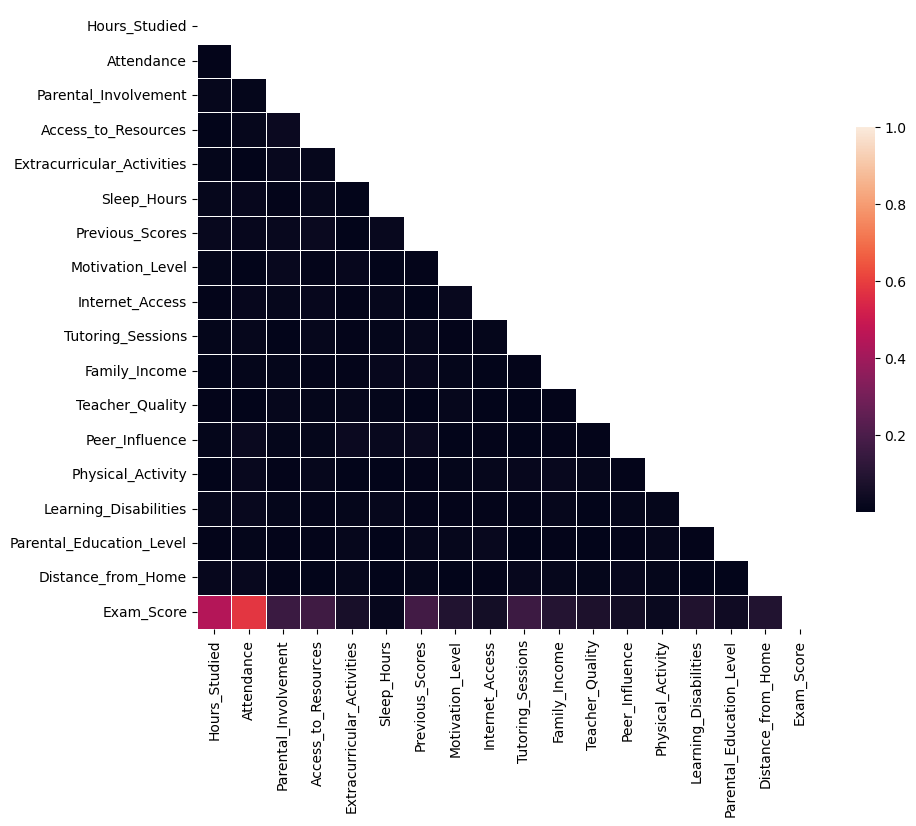

In [70]:
corr=np.abs(df_clean_and_feature_engineered.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [71]:
corr_matrix = df_clean_and_feature_engineered.corr()
target_corr = corr_matrix['Exam_Score'].sort_values(ascending=False)
print(target_corr)

Exam_Score                    1.000000
Attendance                    0.580259
Hours_Studied                 0.445104
Previous_Scores               0.174283
Access_to_Resources           0.167856
Tutoring_Sessions             0.156829
Parental_Involvement          0.156014
Family_Income                 0.094555
Motivation_Level              0.088502
Teacher_Quality               0.075107
Extracurricular_Activities    0.063063
Internet_Access               0.051124
Parental_Education_Level      0.040816
Physical_Activity             0.025148
Sleep_Hours                  -0.017171
Peer_Influence               -0.048290
Learning_Disabilities        -0.083911
Distance_from_Home           -0.088083
Name: Exam_Score, dtype: float64


In [72]:
# Instantiate the model
forest = RandomForestRegressor(max_depth=20, n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(forest, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the scores
mean_cv_score_rf = cv_scores_rf.mean()
std_cv_score_rf = cv_scores_rf.std()

print(f"Mean CV Score (Random Forest): {-mean_cv_score_rf:.2f}")
print(f"Standard Deviation of CV Score (Random Forest): {std_cv_score_rf:.2f}")

Mean CV Score (Random Forest): 5.70
Standard Deviation of CV Score (Random Forest): 1.55


In [73]:
# Instantiate the model
gb_reg = GradientBoostingRegressor(max_depth=20, n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores_gb = cross_val_score(gb_reg, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the scores
mean_cv_score_gb = cv_scores_gb.mean()
std_cv_score_gb = cv_scores_gb.std()

print(f"Mean CV Score (Gradient Boosting): {-mean_cv_score_gb:.2f}")
print(f"Standard Deviation of CV Score (Gradient Boosting): {std_cv_score_gb:.2f}")

Mean CV Score (Gradient Boosting): 11.37
Standard Deviation of CV Score (Gradient Boosting): 2.00


In [75]:
knn = KNeighborsClassifier(n_neighbors=3)

In [76]:
knn.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=3)

In [77]:
print(f"The accuracy of the model is {knn.score(X_test2, y_test2)*100: .2f}%")

The accuracy of the model is  18.81%


In [78]:
print(f"The R2 of the model is {knn.score(X_test2, y_test2): .2f}")

The R2 of the model is  0.19


In [156]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the model
model = RandomForestRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train2, y_train2)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [157]:
y_pred_test = best_model.predict(X_test2)

mae = mean_absolute_error(y_test2, y_pred_test)
rmse = mean_squared_error(y_test2, y_pred_test, squared=False)
r2 = r2_score(y_test2, y_pred_test)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 1.19
RMSE: 2.46
R2 Score: 0.61


In [161]:
model_rf = RandomForestRegressor(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the RandomizedSearchCV object for Random Forest
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist_rf, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

# Fit the random search to the data
random_search_rf.fit(X_train2, y_train2)

# Get the best model
best_rf_random = random_search_rf.best_estimator_

# Predict using the best Random Forest model from Random Search
y_pred_test_rf_random = best_rf_random.predict(X_test2)

# Evaluate the Random Forest model
mae_rf_random = mean_absolute_error(y_test2, y_pred_test_rf_random)
rmse_rf_random = mean_squared_error(y_test2, y_pred_test_rf_random, squared=False)
r2_rf_random = r2_score(y_test2, y_pred_test_rf_random)

print(f"Random Forest - Random Search:")
print(f"MAE: {mae_rf_random:.2f}")
print(f"RMSE: {rmse_rf_random:.2f}")
print(f"R2 Score: {r2_rf_random:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest - Random Search:
MAE: 1.07
RMSE: 2.36
R2 Score: 0.64


In [162]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Instantiate the Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=42)

# Instantiate the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=model_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_gb.fit(X_train2, y_train2)

# Get the best model
best_gb = grid_search_gb.best_estimator_

# Predict using the best Gradient Boosting model
y_pred_test_gb = best_gb.predict(X_test2)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test2, y_pred_test_gb)
rmse_gb = mean_squared_error(y_test2, y_pred_test_gb, squared=False)
r2_gb = r2_score(y_test2, y_pred_test_gb)

print(f"Gradient Boosting - Grid Search:")
print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R2 Score: {r2_gb:.2f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Gradient Boosting - Grid Search:
MAE: 0.65
RMSE: 2.20
R2 Score: 0.68


In [163]:
param_dist_gb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the RandomizedSearchCV object for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=model_gb, param_distributions=param_dist_gb, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

# Fit the random search to the data
random_search_gb.fit(X_train2, y_train2)

# Get the best model
best_gb_random = random_search_gb.best_estimator_

# Predict using the best Gradient Boosting model from Random Search
y_pred_test_gb_random = best_gb_random.predict(X_test2)

# Evaluate the Gradient Boosting model
mae_gb_random = mean_absolute_error(y_test2, y_pred_test_gb_random)
rmse_gb_random = mean_squared_error(y_test2, y_pred_test_gb_random, squared=False)
r2_gb_random = r2_score(y_test2, y_pred_test_gb_random)

print(f"Gradient Boosting - Random Search:")
print(f"MAE: {mae_gb_random:.2f}")
print(f"RMSE: {rmse_gb_random:.2f}")
print(f"R2 Score: {r2_gb_random:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Gradient Boosting - Random Search:
MAE: 0.67
RMSE: 2.20
R2 Score: 0.68


In [235]:
risk_threshold = 70

df_clean_and_feature_engineered['at_risk'] = df_clean_and_feature_engineered['Exam_Score'].apply(lambda x: 1 if x < risk_threshold else 0)

In [236]:
df_clean_and_feature_engineered['at_risk'].value_counts()

at_risk
1    4797
0    1581
Name: count, dtype: int64

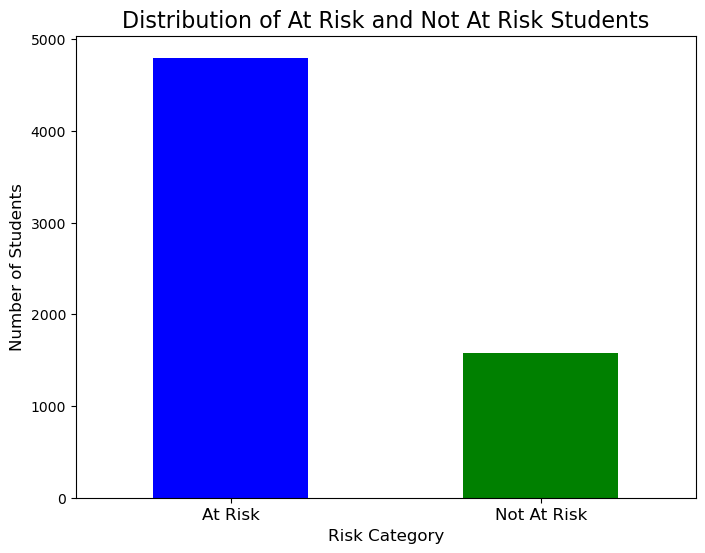

In [237]:
risk_counts = df_clean_and_feature_engineered['at_risk'].value_counts()

plt.figure(figsize=(8, 6))
risk_counts.plot(kind='bar', color=['blue', 'green'])

plt.title('Distribution of At Risk and Not At Risk Students', fontsize=16)
plt.xticks([0, 1], ['At Risk', 'Not At Risk'], rotation=0, fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xlabel('Risk Category', fontsize=12)

plt.show()